In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas

from collections import defaultdict, Counter

## Part 1
<img src="img/Exercise06.png" width=1000>

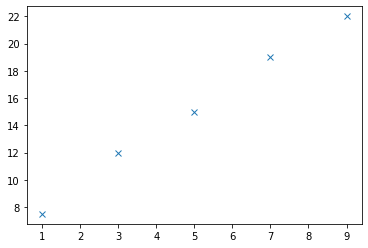

In [8]:
x = np.array([1, 3, 5, 7, 9])
y = np.array([7.5, 12, 15, 19, 22])

plt.plot(x, y, "x")

In [5]:
def flat(x, lower, upper):
    try:
        len(x)
        r = np.zeros_like(x)
        L = (x > lower) & (x < upper)
        r[L] = 1/(upper - lower)
    except TypeError:
        if x > lower and x < upper:
            r = 1/(upper - lower)
        else:
            r = 0
    return r
    

In [9]:
def func(x, a, b):
    return np.sqrt(a * b * x) + np.log(a * x) + 0.5 * np.sqrt(b) * x


In [12]:
def prior(a, b):
    return flat(a, lower=0.5, upper=30) * flat(b, lower=0.2, upper=20)

prior(1, 2)

0.001712035610340695

In [42]:
def log_likelihood(a, b, data, f=func, sigma=1):
    
    return - 0.5 / sigma * np.sum([
        (y-f(x, a, b))**2 for x, y in data
    ], axis=0)

log_likelihood(1, 2, data=zip(x, y))

-134.1517143026549

In [43]:
def log_posterior(a, b, data, f=func, sigma=1):
    return log_likelihood(a, b, data, f=f, sigma=sigma) + np.log(prior(a, b))

log_posterior(1, 2, data=zip(x, y))

-140.52178650370118

In [80]:
N = 200
aa = np.linspace(0, 32, N)
bb = np.linspace(0, 22, N)
a, b = np.meshgrid(aa, bb)

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_32057/3686745573.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(a * b * x) + np.log(a * x) + 0.5 * np.sqrt(b) * x


Text(0.5, 1.0, 'Posterior')

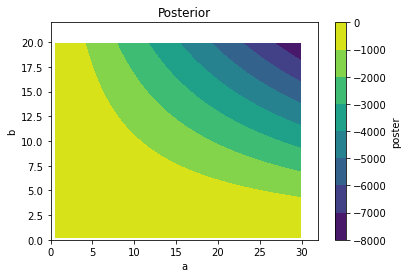

In [81]:
plt.contourf(
    a,
    b,
    log_posterior(a, b, data=zip(x, y))
)

plt.xlabel("a")
plt.ylabel("b")
cbar = plt.colorbar()
cbar.set_label("poster")

plt.title("Posterior")


/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_32057/3686745573.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(a * b * x) + np.log(a * x) + 0.5 * np.sqrt(b) * x


Text(0.5, 1.0, 'Posterior')

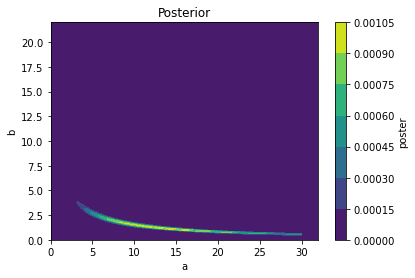

In [82]:
plt.contourf(
    a,
    b,
    np.exp(log_posterior(a, b, data=zip(x, y)))
)

plt.xlabel("a")
plt.ylabel("b")
cbar = plt.colorbar()
cbar.set_label("poster")

plt.title("Posterior")


In [83]:
p = log_posterior(a, b, data=zip(x, y))
index = np.nanargmax(p)

a_expected = a.flatten()[index]
b_expected = b.flatten()[index]
a_expected, b_expected

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_32057/3686745573.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(a * b * x) + np.log(a * x) + 0.5 * np.sqrt(b) * x


(11.738693467336683, 1.3266331658291457)

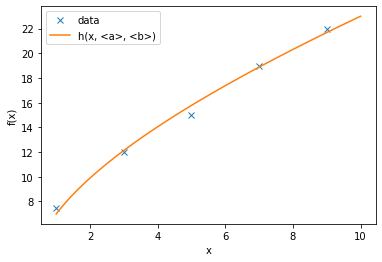

In [84]:
plt.plot(x, y, "x", label="data")

t = np.linspace(1, 10, 100)
plt.plot(t, func(t, a_expected, b_expected), label="h(x, <a>, <b>)")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

### Marginalized posteriors $p(a | data) = \int \mathrm{d}b ~p(a, b | d)$

In [85]:
p = log_posterior(a, b, data=zip(x, y))

/var/folders/y5/v1z7p_cs5r52n2kw2rl1bymc0000gp/T/ipykernel_32057/3686745573.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(a * b * x) + np.log(a * x) + 0.5 * np.sqrt(b) * x


In [88]:
marginal_likelihood_a = np.sum(np.exp(p), axis=1)
marginal_likelihood_b = np.sum(np.exp(p), axis=0)

In [89]:
marginal_likelihood_a

array([0.00000000e+00, 0.00000000e+00, 6.70249596e-22, 2.52881141e-10,
       1.03783404e-04, 1.10918826e-02, 2.13305352e-02, 2.14607638e-02,
       2.08711060e-02, 1.98867433e-02, 1.86498301e-02, 1.72690363e-02,
       1.58254510e-02, 1.43780198e-02, 1.29682567e-02, 1.16241810e-02,
       1.03635278e-02, 9.19632228e-03, 8.12691655e-03, 7.15558150e-03,
       6.27973739e-03, 5.49489424e-03, 4.79536154e-03, 4.17477640e-03,
       3.62648971e-03, 3.14384257e-03, 2.72035836e-03, 2.34987076e-03,
       2.02660370e-03, 1.74521562e-03, 1.50081776e-03, 1.28897398e-03,
       1.10568765e-03, 9.47380134e-04, 8.10863957e-04, 6.93313088e-04,
       5.92232081e-04, 5.05425301e-04, 4.30967088e-04, 3.67173420e-04,
       3.12575426e-04, 2.65894924e-04, 2.26022072e-04, 1.91995104e-04,
       1.62982094e-04, 1.38264644e-04, 1.17223361e-04, 9.93249917e-05,
       8.41110659e-05, 7.11879125e-05, 6.02179051e-05, 5.09118086e-05,
       4.30221069e-05, 3.63371972e-05, 3.06763528e-05, 2.58853575e-05,
      

Text(0, 0.5, 'marginal likelihood p(a|d)')

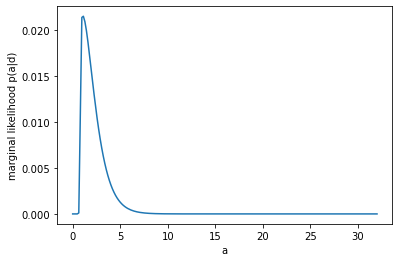

In [91]:
plt.plot(aa, marginal_likelihood_a)
plt.xlabel("a")
plt.ylabel("marginal likelihood p(a|d)")

Text(0, 0.5, 'marginal likelihood p(b|d)')

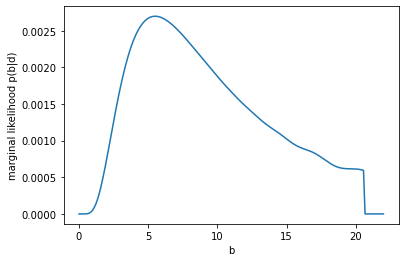

In [92]:
plt.plot(bb, marginal_likelihood_b)
plt.xlabel("b")
plt.ylabel("marginal likelihood p(b|d)")

In [97]:
var_a = np.sum(aa**2 * marginal_likelihood_a)
var_b = np.sum(bb**2 * marginal_likelihood_b)
var_a, var_b

(1.6295029398288947, 28.449558041979948)

In [98]:
np.sqrt(var_a), np.sqrt(var_b)

(1.27651985485103, 5.333812711558211)

## Part B

In [99]:
def h(x, a, b):
    return a * b * x

In [101]:
h(x=6, a=a_expected, b=b_expected)

93.43764046362466

In [105]:
def error_classical(x, a, b, var_a, var_b):
    # dh/da = b*x , dh/db = a*x
    return np.sqrt((b*x)**2 * var_a + (a*x)**2 * var_b)

error_classical(
    x=6,
    a=a_expected,
    b=b_expected,
    var_a=var_a,
    var_b=var_b
)

375.80934018642694